In [21]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [9]:
# 1.1
df.category.value_counts().reset_index()

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
...,...,...
291,Alexa Built-In Devices,107
292,Motorbike Chassis,107
293,Plugs,107
294,Smart Home Security & Lighting,104


In [15]:
df_top5 = df.category.value_counts().head(5).reset_index()
df_top5

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


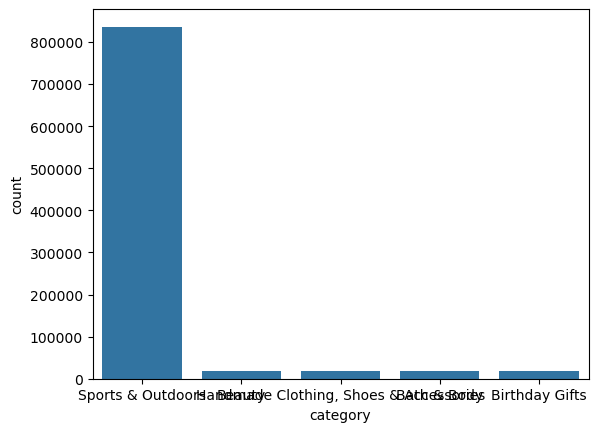

In [25]:
# 1.2
sn.barplot(x='category', y='count', data=df_top5)
plt.show()

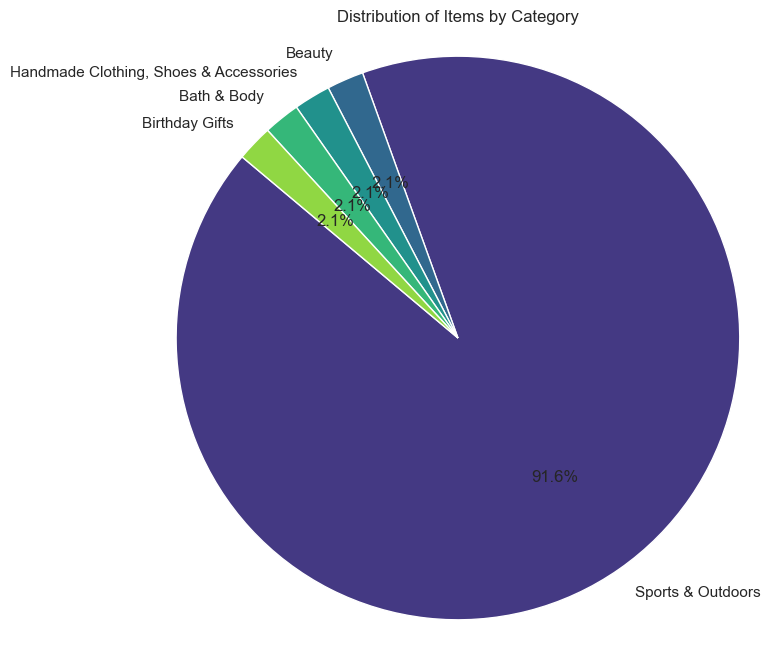

In [53]:
sn.set_theme(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(df_top5['count'], labels=df_top5['category'], autopct='%1.1f%%', startangle=140, colors=sn.color_palette("viridis", len(df_top5)))

#autopct='%1.1f%%' ----> toma una cadena de formato que especifica cómo se debe mostrar el texto en las porciones del gráfico. 
#startangle=140  ---->  Este parámetro especifica el ángulo en grados a partir del cual se comienza a dibujar el primer segmento del gráfico de pastel

# Personalizar título
plt.title('Distribution of Items by Category')

# Mostrar el gráfico
plt.axis('equal')  # Igualar los ejes para que el gráfico sea un círculo
plt.show()

In [ ]:
# The category Sports & Outdoors clearly dominates the listing

In [63]:
# 2.1
df.price.mean().round(2)

89.24

In [65]:
df.price.mode().round(2)

0    9.99
Name: price, dtype: float64

In [67]:
df.price.median()

19.09

In [ ]:
# The average price is 89.24GBP, and it does not match the mode wich means that there must be a bunch of values with a really high price, therefore the mean is skewed upside.

In [74]:
# 2.2
round(df.price.var(),2)

119445.49

In [76]:
round(df.price.std(),2)

345.61

In [80]:
df['price'].max() - df['price'].min()

100000.0

In [82]:
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)
iqr

36.0

In [ ]:
# The standard deviation as well as variance are huge, which means there are a lot of outliers. The range reflects that too with a huge difference between the max and the min

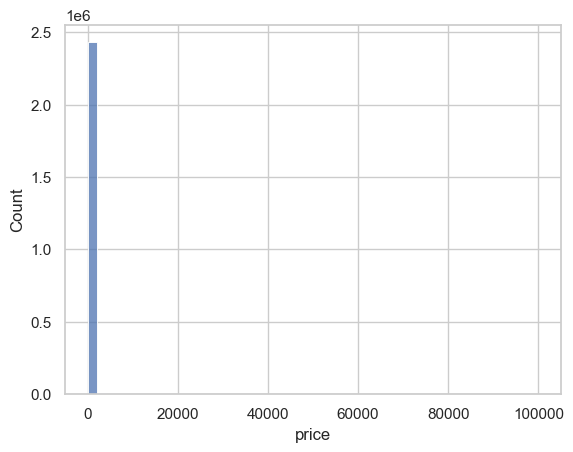

In [90]:
# 2.3
sn.histplot(df.price, bins=50)
plt.show()

In [ ]:
# There are a lot of books with a price of 0 GBP. The plot is not representative because of the amount of them.

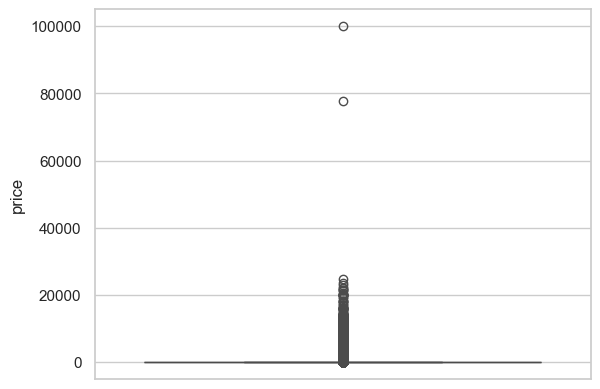

In [92]:
sn.boxplot(data=df.price)
plt.show()

In [ ]:
# There are two products that are priced significantly higher than the rest

In [94]:
# 3.1
df.stars.mean().round(2)

2.15

In [98]:
df.stars.median()

0.0

In [100]:
df.stars.mode().round(2)

0    0.0
Name: stars, dtype: float64

In [ ]:
# The customers generally rate products with the lowest score: 0 stars

In [104]:
# 3.2
round(df.stars.var(),2)

4.82

In [114]:
round(df.stars.std(),2)

2.19

In [108]:
df['stars'].max() - df['stars'].min()

5.0

In [112]:
df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

4.4

In [ ]:
# There is a wide variation among the ratings on average, which means that there are a lot of extreme values, but the value of 0 is the most repeated as the mode and median show.


In [126]:
# 3.3
df.stars.kurtosis().round(2)
# The distribution is in the range of being qualified as normal

-1.93

In [124]:
df.stars.skew().round(2)
# The result showsthat the distribution is perfectly symmetrical

0.08

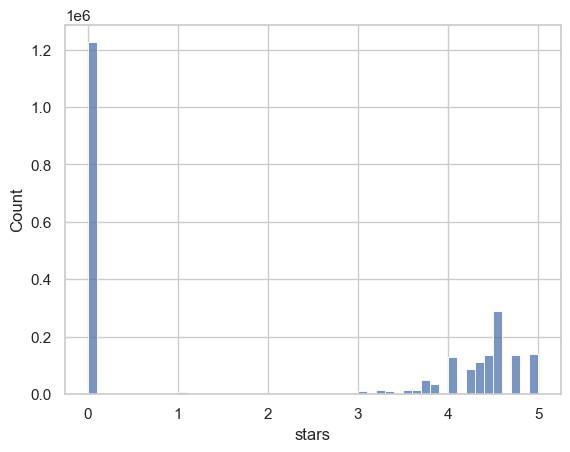

In [128]:
sn.histplot(df.stars, bins=50)
plt.show()

In [ ]:
# The plot reflects that the people rate the product 0 on average the most. However, there's other type of consumer which tends to rate them with a higher score, so there are not middle values